In [1]:
import numpy as np
import matplotlib.pyplot as plt

import holodeck as holo
from holodeck.constants import YR, MSOL


In [2]:
import kalepy as kale
import holodeck.cyutils as cy
import holodeck.single_sources as ss

edges, number, fobs, exname = ss.example5()
h2fdf = ss.h2fdf(edges)
mt = kale.utils.midpoints(edges[0]) #: total mass
mr = kale.utils.midpoints(edges[1]) #: mass ratio
rz = kale.utils.midpoints(edges[2]) #: redshift

Number of frequency bins: 24
  between [0.10, 2.50] 1/yr
          [3.17, 79.22] nHz
using default mtot, mrat, and redz
edges: [array([1.98840987e+37, 2.60119300e+37, 3.40282209e+37, 4.45149521e+37,
       5.82334576e+37, 7.61796975e+37, 9.96565642e+37, 1.30368473e+38,
       1.70545099e+38, 2.23103257e+38, 2.91858655e+38, 3.81802918e+38,
       4.99465977e+38, 6.53390141e+38, 8.54750264e+38, 1.11816504e+39,
       1.46275832e+39, 1.91354748e+39, 2.50325972e+39, 3.27470797e+39,
       4.28389920e+39, 5.60410044e+39, 7.33115796e+39, 9.59045570e+39,
       1.25460181e+40, 1.64124183e+40, 2.14703559e+40, 2.80870360e+40,
       3.67428278e+40, 4.80661396e+40, 6.28790411e+40, 8.22569452e+40,
       1.07606683e+41, 1.40768639e+41, 1.84150362e+41, 2.40901356e+41,
       3.15141727e+41, 4.12261308e+41, 5.39310957e+41, 7.05514445e+41,
       9.22938105e+41, 1.20736684e+42, 1.57945010e+42, 2.06620105e+42,
       2.70295767e+42, 3.53594833e+42, 4.62564796e+42, 6.05116846e+42,
       7.91600228e+4

In [5]:
# hc_ss, hc_bg, ssidx, hsamp, bgpar, sspar = ss.ss_by_cdefs(edges, number, 30, params=True)
infile = np.load('/Users/emigardiner/GWs/holodeck/ecg-notebooks/single_sources/ss-dev/ss_params_arr.npz')
hc_ss= infile['hc_ss']
hc_bg= infile['hc_bg']
ssidx= infile['ssidx']
bgpar= infile['bgpar'] 
sspar= infile['sspar']

In [5]:
np.savez('/Users/emigardiner/GWs/holodeck/ecg-notebooks/single_sources/ss-dev/ss_params_arr.npz', hc_ss= hc_ss, hc_bg=hc_bg, ssidx=ssidx,
        bgpar=bgpar, sspar=sspar)

In [6]:
print(bgpar.shape)
print(hc_bg.shape)

(3, 25, 30)
(25, 30)


In [6]:
import holodeck.single_sources as ss


showing everything, full chaos

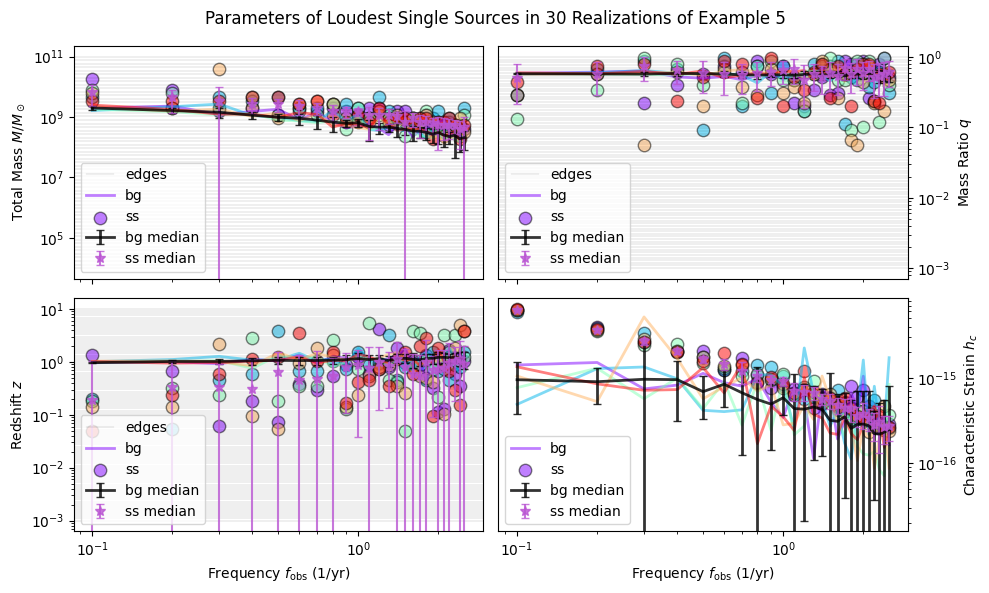

In [23]:
fig, axs = plt.subplots(2, 2, figsize=(10,6), sharex=True)
fig.suptitle(('Parameters of Loudest Single Sources in %d Realizations of ' % hc_bg.shape[1])
             +exname)

grid = np.empty((2,2), dtype=list)
grid[0,0] = edges[0]/MSOL
grid[0,1] = edges[1]
grid[1,0] = edges[2]
grid[1,1] = edges[3]
xx = fobs * YR

bg_marr = bgpar[0,:,:]
bg_qarr = bgpar[1,:,:]
bg_zarr = bgpar[2,:,:]
bg_params = np.array([[bg_marr/MSOL, bg_qarr], [bg_zarr, hc_bg]])

ss_marr = sspar[0,:,:]
ss_qarr = sspar[1,:,:]
ss_zarr = sspar[2,:,:]
ss_params = np.array([[ss_marr/MSOL, ss_qarr], [ss_zarr, hc_ss]])


ss.plot_params(axs, xx, grid, REALS=5, 
               BG_PARAMS=bg_params, SS_PARAMS=ss_params,
               SHOW_GRID=True)



fig.tight_layout()

remove grid -> zoom

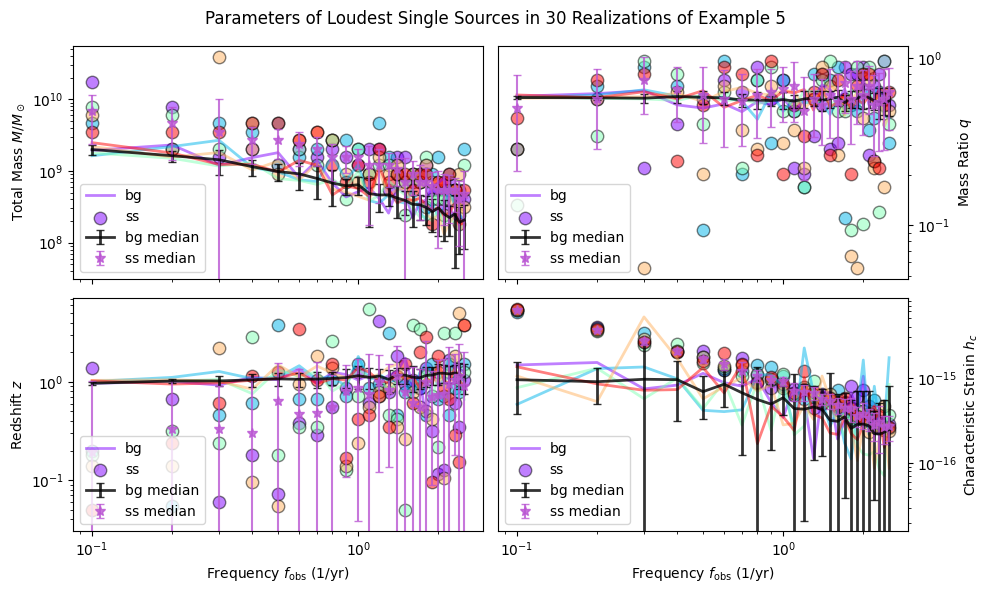

In [22]:
fig, axs = plt.subplots(2, 2, figsize=(10,6), sharex=True)
fig.suptitle(('Parameters of Loudest Single Sources in %d Realizations of ' % hc_bg.shape[1])
             +exname)

grid = np.empty((2,2), dtype=list)
grid[0,0] = edges[0]/MSOL
grid[0,1] = edges[1]
grid[1,0] = edges[2]
grid[1,1] = edges[3]
xx = fobs * YR

bg_marr = bgpar[0,:,:]
bg_qarr = bgpar[1,:,:]
bg_zarr = bgpar[2,:,:]
bg_params = np.array([[bg_marr/MSOL, bg_qarr], [bg_zarr, hc_bg]])

ss_marr = sspar[0,:,:]
ss_qarr = sspar[1,:,:]
ss_zarr = sspar[2,:,:]
ss_params = np.array([[ss_marr/MSOL, ss_qarr], [ss_zarr, hc_ss]])


ss.plot_params(axs, xx, grid, REALS=5, 
               BG_PARAMS=bg_params, SS_PARAMS=ss_params,
               SHOW_GRID=False)


fig.tight_layout()

remove errorbars

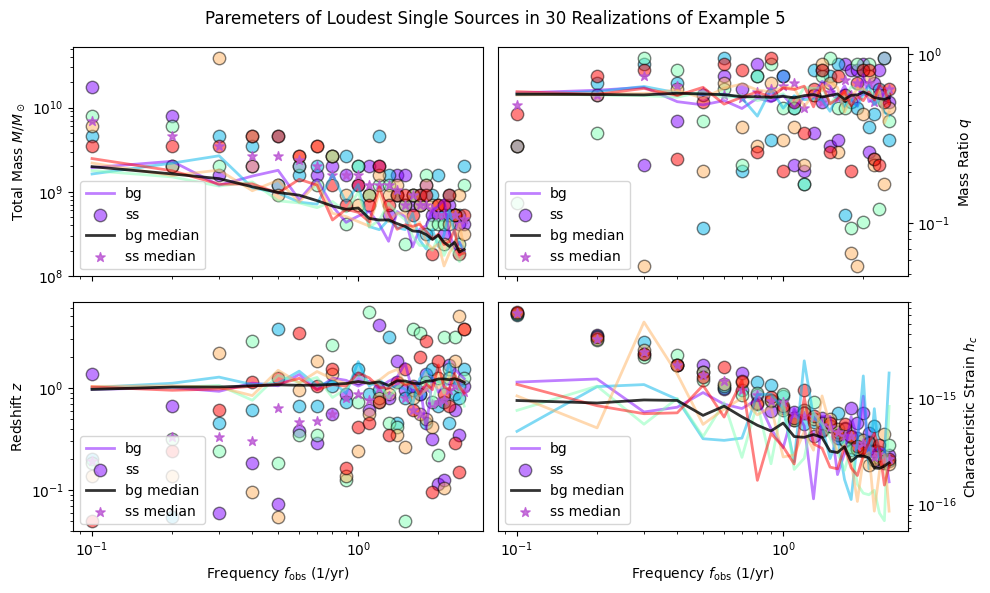

In [21]:
fig, axs = plt.subplots(2, 2, figsize=(10,6), sharex=True)
fig.suptitle(('Paremeters of Loudest Single Sources in %d Realizations of ' % hc_bg.shape[1])
             +exname)

grid = np.empty((2,2), dtype=list)
grid[0,0] = edges[0]/MSOL
grid[0,1] = edges[1]
grid[1,0] = edges[2]
grid[1,1] = edges[3]
xx = fobs * YR

bg_marr = bgpar[0,:,:]
bg_qarr = bgpar[1,:,:]
bg_zarr = bgpar[2,:,:]
bg_params = np.array([[bg_marr/MSOL, bg_qarr], [bg_zarr, hc_bg]])

ss_marr = sspar[0,:,:]
ss_qarr = sspar[1,:,:]
ss_zarr = sspar[2,:,:]
ss_params = np.array([[ss_marr/MSOL, ss_qarr], [ss_zarr, hc_ss]])


ss.plot_params(axs, xx, grid, REALS=5, 
               BG_PARAMS=bg_params, SS_PARAMS=ss_params,
               BG_ERRORS=False, SS_ERRORS=False,
               SHOW_GRID=False)


fig.tight_layout()

just medians & errors, no reals

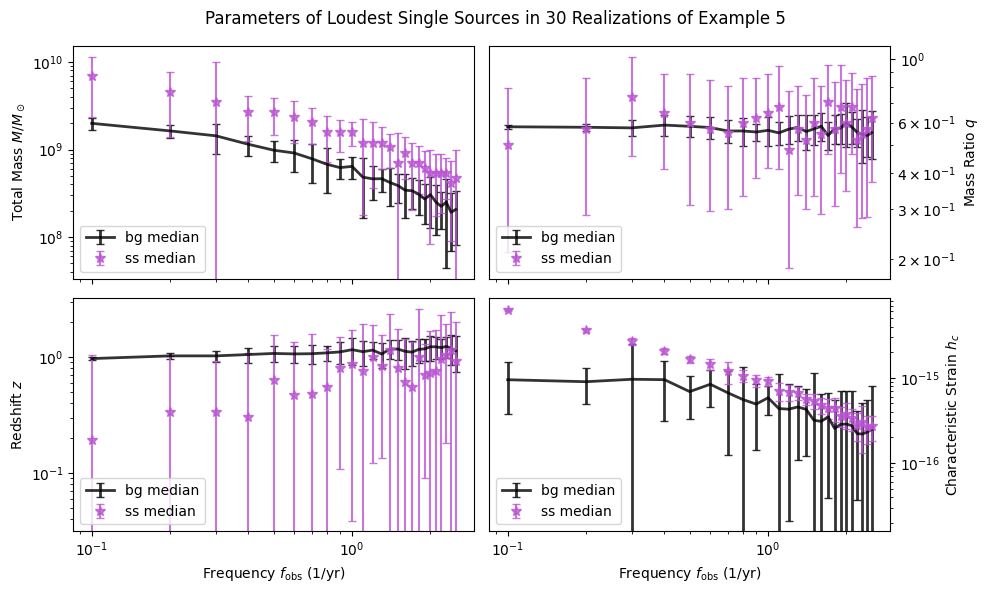

In [19]:
fig, axs = plt.subplots(2, 2, figsize=(10,6), sharex=True)
fig.suptitle(('Parameters of Loudest Single Sources in %d Realizations of ' % hc_bg.shape[1])
             +exname)

grid = np.empty((2,2), dtype=list)
grid[0,0] = edges[0]/MSOL
grid[0,1] = edges[1]
grid[1,0] = edges[2]
grid[1,1] = edges[3]
xx = fobs * YR

bg_marr = bgpar[0,:,:]
bg_qarr = bgpar[1,:,:]
bg_zarr = bgpar[2,:,:]
bg_params = np.array([[bg_marr/MSOL, bg_qarr], [bg_zarr, hc_bg]])

ss_marr = sspar[0,:,:]
ss_qarr = sspar[1,:,:]
ss_zarr = sspar[2,:,:]
ss_params = np.array([[ss_marr/MSOL, ss_qarr], [ss_zarr, hc_ss]])


ss.plot_params(axs, xx, grid, REALS=0, 
               BG_PARAMS=bg_params, SS_PARAMS=ss_params,
               BG_ERRORS=True, SS_ERRORS=True,
               SHOW_GRID=False)


fig.tight_layout()

just reals, no errorbars or medians

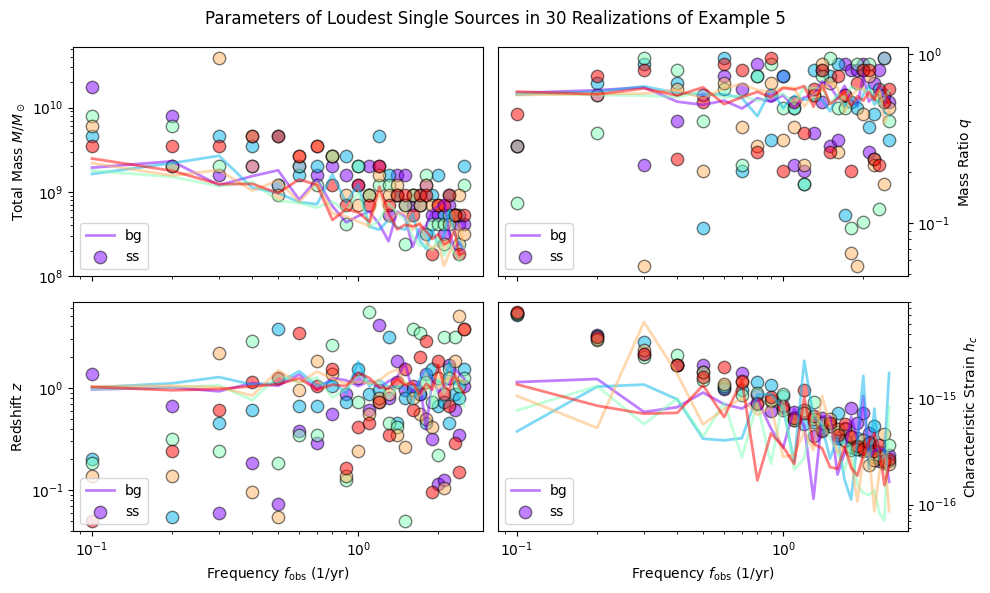

In [18]:
fig, axs = plt.subplots(2, 2, figsize=(10,6), sharex=True)
fig.suptitle(('Parameters of Loudest Single Sources in %d Realizations of ' % hc_bg.shape[1])
             +exname)

grid = np.empty((2,2), dtype=list)
grid[0,0] = edges[0]/MSOL
grid[0,1] = edges[1]
grid[1,0] = edges[2]
grid[1,1] = edges[3]
xx = fobs * YR

bg_marr = bgpar[0,:,:]
bg_qarr = bgpar[1,:,:]
bg_zarr = bgpar[2,:,:]
bg_params = np.array([[bg_marr/MSOL, bg_qarr], [bg_zarr, hc_bg]])

ss_marr = sspar[0,:,:]
ss_qarr = sspar[1,:,:]
ss_zarr = sspar[2,:,:]
ss_params = np.array([[ss_marr/MSOL, ss_qarr], [ss_zarr, hc_ss]])


ss.plot_params(axs, xx, grid, REALS=5, 
               BG_PARAMS=bg_params, SS_PARAMS=ss_params,
               BG_MEDIAN=False, SS_MEDIAN=False,
               SHOW_GRID=False)


fig.tight_layout()